In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading csv file as a data frame using pandas
df = pd.read_csv('cars.csv')

In [3]:
#exploring data for any null or invalid values
df.head()

,passedemissions,mpg,displacement,horsepower,cylinders,weight,acceleration,modelyear,carname
0,False,18.0,307.0,130.0,8.0,1.7520,12.0,70.0,chevrolet chevelle malibu
1,False,15.0,350.0,165.0,8.0,1.8465,11.5,70.0,buick skylark 320
2,False,18.0,318.0,150.0,8.0,1.7180,11.0,70.0,plymouth satellite
3,False,16.0,304.0,150.0,8.0,1.7165,12.0,70.0,amc rebel sst
4,False,17.0,302.0,140.0,8.0,1.7245,10.5,70.0,ford torino


In [4]:
df.describe()

,mpg,displacement,horsepower,cylinders,weight,acceleration,modelyear
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,5.471939,1.488792,15.541327,75.979592
std,7.805007,104.644004,38.491160,1.705783,0.424701,2.758864,3.683737
min,9.000000,68.000000,46.000000,3.000000,0.806500,8.000000,70.000000
25%,17.000000,105.000000,75.000000,4.000000,1.112625,13.775000,73.000000
50%,22.750000,151.000000,93.500000,4.000000,1.401750,15.500000,76.000000
75%,29.000000,275.750000,126.000000,8.000000,1.807375,17.025000,79.000000
max,46.600000,455.000000,230.000000,8.000000,2.570000,24.800000,82.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 9 columns):
passedemissions    392 non-null object
mpg                392 non-null float64
displacement       392 non-null float64
horsepower         392 non-null float64
cylinders          392 non-null float64
weight             392 non-null float64
acceleration       392 non-null float64
modelyear          392 non-null float64
carname            392 non-null object
dtypes: float64(7), object(2)
memory usage: 27.7+ KB


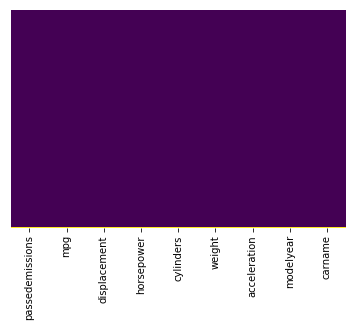

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
df.tail()

,passedemissions,mpg,displacement,horsepower,cylinders,weight,acceleration,modelyear,carname
388,True,44.0,97.0,52.0,4.0,1.0650,24.6,82.0,vw pickup
389,True,32.0,135.0,84.0,4.0,1.1475,11.6,82.0,dodge rampage
390,True,28.0,120.0,79.0,4.0,1.3125,18.6,82.0,ford ranger
391,True,31.0,119.0,82.0,4.0,1.3600,19.4,82.0,chevy s-10
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#dropping last row which contains null values
df.dropna(inplace=True)

In [57]:
#converting the boolean value of passedemissions into integers
passed_emissions=pd.get_dummies(df['passedemissions'],drop_first=True)

In [58]:
df.tail()

,passedemissions,mpg,displacement,horsepower,cylinders,weight,acceleration,modelyear,carname
387,True,27.0,140.0,86.0,4.0,1.3950,15.6,82.0,ford mustang gl
388,True,44.0,97.0,52.0,4.0,1.0650,24.6,82.0,vw pickup
389,True,32.0,135.0,84.0,4.0,1.1475,11.6,82.0,dodge rampage
390,True,28.0,120.0,79.0,4.0,1.3125,18.6,82.0,ford ranger
391,True,31.0,119.0,82.0,4.0,1.3600,19.4,82.0,chevy s-10


In [59]:
#adding new column of integered passed emission variable
df = pd.concat([df,passed_emissions],axis=1)

In [60]:
df.head()

,passedemissions,mpg,displacement,horsepower,cylinders,weight,acceleration,modelyear,carname,True
0,False,18.0,307.0,130.0,8.0,1.7520,12.0,70.0,chevrolet chevelle malibu,0
1,False,15.0,350.0,165.0,8.0,1.8465,11.5,70.0,buick skylark 320,0
2,False,18.0,318.0,150.0,8.0,1.7180,11.0,70.0,plymouth satellite,0
3,False,16.0,304.0,150.0,8.0,1.7165,12.0,70.0,amc rebel sst,0
4,False,17.0,302.0,140.0,8.0,1.7245,10.5,70.0,ford torino,0


In [61]:
df.columns

Index(['passedemissions',             'mpg',    'displacement',
            'horsepower',       'cylinders',          'weight',
          'acceleration',       'modelyear',         'carname',
                    True],
      dtype='object')

In [62]:
X=df[['displacement','horsepower','cylinders','weight','acceleration','modelyear',True]]

In [63]:
#target variable
y=df['mpg']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
#splitting the data into two: test and training data in ratio of 30 and 70 percent resp. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lm = LinearRegression()

In [69]:
#fitting the model using our training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
#estimating values of mpg by using our test data
estimations = lm.predict(X_test)

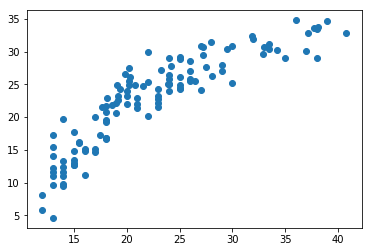

In [71]:
plt.scatter(y_test,estimations)

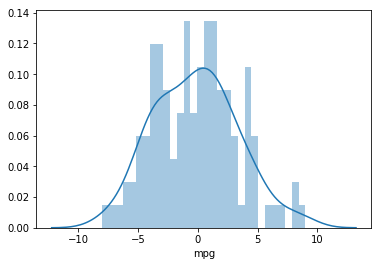

In [74]:
sns.distplot((y_test-estimations),bins=30)
#normally distributed residuals show that linear regression was a good option

In [75]:
from sklearn import metrics

In [76]:
metrics.mean_absolute_error(y_test,estimations)

2.7879739426209564

In [77]:
metrics.mean_squared_error(y_test,estimations)

11.82403930231483

In [78]:
np.sqrt(metrics.mean_squared_error(y_test,estimations))

3.438610082913564